## Проект: анализ и прогнозирование продаж компьтерных игр интернет-магазина "Стримчик" ##


**Описание проекта**

  Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. 

**Цель проекта**

Выявить потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

1. Изучение общей информации в файле с данными
2. Подготовка данных
3. Исследовательский анализ данных:
   
   3.1 количество выпускаемых игр в разные годы
   
   3.2 суммы продаж по различным платформам
   
   3.3 выбор актуального периода
   
   3.4 выбор потенциально прибыльных платформ в актуальном периоде
   
   3.5 построение «ящика с усами» по глобальным продажам игр в разбивке по платформам
   
   3.6 анализ влияния внутри платформ отзывов критиков и пользователей
   
   3.7 распределение игр по жанрам, выбор самых прибыльных жанров
4. Портрет пользователя каждого региона
5. Проверка гипотез:
   
      средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   
      средние  пользовательские рейтинги жанров Action и Sport разны
6. Общий вывод.

**Описание данных**

Файл /datasets/games.csv

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

## 1.Общая информация ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2.Подготовка данных ##

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
data.isnull().sum()*100/len(data)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [10]:
data['name'].isna().sum()

2

Всего 2 пропуска в столбце 'name'. Считаю, что можно их удалить

In [11]:
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Процент пропусков в столбце год выпуска крайне мал (1,6%). Для дальнейшего анализа по годам они не нужны, считаю можно их удалить.

In [12]:
data = data[data['year_of_release'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Процент пропусков в столбцах оценок критиков, пользователей и рейтинга очень высок. Однако эти пропуски заменить нечем. Оценки индивидуальны.

In [13]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Аббревиатура 'tbd' означает, что оценка не определена. Заменю на NAN

In [14]:
data['user_score']=data['user_score'].replace({'tbd':np.NaN})
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [15]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [17]:
data['critic_score'] = data['critic_score'].astype('float')

In [18]:
data['user_score'] = data['user_score'].astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Большое количество пропусков в оценках пользователей и критиков возможно связано с тем, что многие пользователи и критики, покупая игры, не оставляли свои оценки.

**Суммарные продажи**

In [20]:
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Удаление дубликатов**

In [21]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [22]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [23]:
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Проверка на неявные дубликаты показала, что есть дубликаты, отличающиеся только по столбцу продаж в Европе. Просуммируем и оставим одну строку.

In [24]:
data.loc[604, 'eu_sales'] = 0.23

In [25]:
data = data.drop(index= [16230])
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [26]:
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Дубликаты отсутствуют

**Вывод**

В исходном файле 16713 строк. Названия столбцов приведены к нижнему регистру. Проведя анализ на пропуски, в данных были удалены 2 строки с пропусками в названиях игр и 269 строк с пропусками данных в столбце год выпуска. Процент пропусков в столбцах оценок критиков, пользователей и рейтинга очень высок. Однако эти пропуски заменить нечем. Оценки индивидуальны. Аббревиатура 'tbd' в столбце оценка пользователей означает, что оценка не определена, замена на NAN. Изменены типы данных в столбцах оценок пользователей, оценок критиков и год выпуска. Создан столбец с суммарными продажами игр по регионам. Проведена проверка на дубликаты, неявные дубликаты обработаны.

In [27]:
# Комментарий ревьюера 0
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [28]:
data['rating'] = data['rating'].fillna('Unknown')

## 3.Исследовательский анализ данных ##

**3.1 Количество выпускаемых игр в разные годы**

In [31]:
data_year = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_year.columns = ['games']
data_year

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


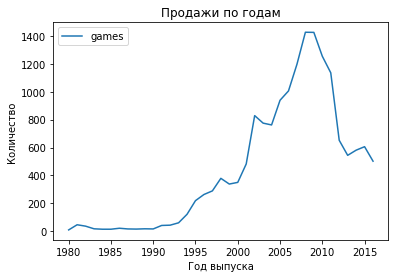

In [32]:
data_year.plot()
plt.title('Продажи по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

До 1990 года игр выпускалось немного. С 1995г. началось увеличение количества игр, с 2010г. наблюдается снижение.

**3.2 Суммы продаж по различным платформам**

In [33]:
data_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
data_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


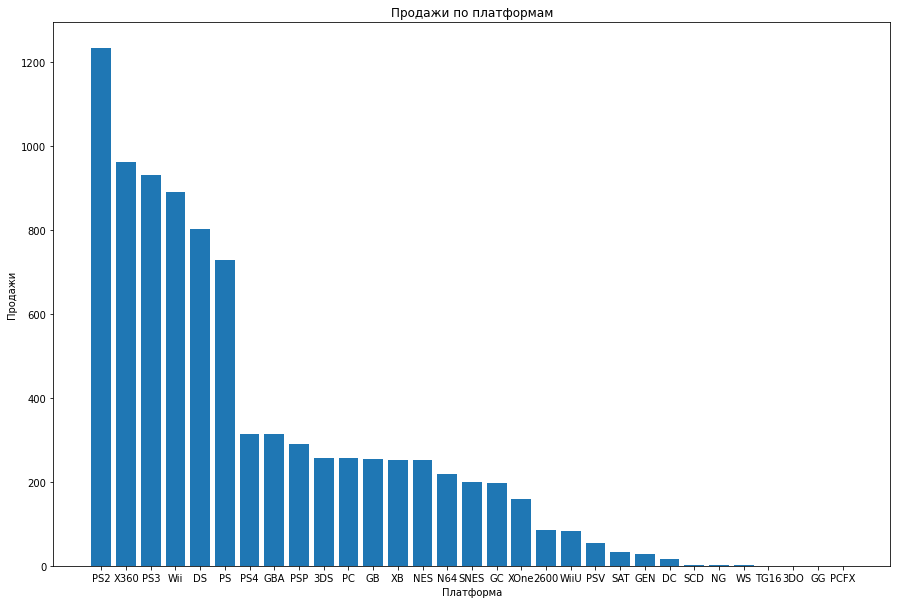

In [34]:
plt.figure(figsize=(15,10))
plt.bar(data_platform['platform'], data_platform['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel("Платформа");
plt.ylabel("Продажи");

По графику видно, что больше всего суммы продаж у 6 платформ: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.

In [35]:
max_sale = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
max_sale

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

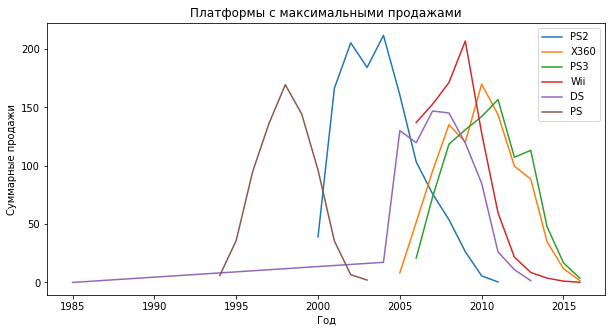

In [36]:
for a in max_sale:
    (
    data.query('platform == @a')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=a)
    )
    plt.title('Платформы с максимальными продажами')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

Пик продаж платформы PS - 1998г., платформы PS2 - 2003-2005гг., платформы DS - 2005-2007гг., платформы Wii - 2010г., платформы Х360 - 2011, платформы PS3 - 2012г. На графике видно, что как только появляется и становится популярной новая платформа, продажи старой резко падают. Характерный период появления новых и исчезновения старых платформ примерно 10 лет. Рост продаж платформ как правило в течении 5 лет.

**3.3 Выбор актуального периода**

Актуальным периодом считаю период, начиная с 2013г., т.к. он не сильно отдален от 2017г. и на рынке присутствуют крупные платформы X360, PS3.

**3.4 выбор потенциально прибыльных платформ в актуальном периоде**

In [37]:
period = data[data['year_of_release'] >= 2013]
period.info()
period.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [38]:
period_sales = pd.pivot_table(period, index='platform', values='total_sales', aggfunc = 'sum')
period_sales.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Рассматривая отрезок времени с 2013г., лидеры продаж: PS4, PS3, XOne.

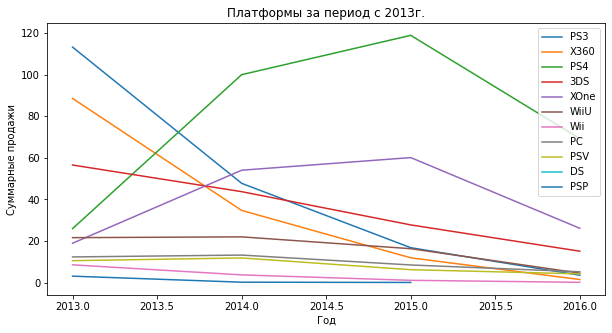

In [39]:
for b in period['platform'].unique():
    (
    period.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=b)
    )
    plt.title('Платформы за период с 2013г.')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

По графику видно, что у всех платформ продажи падают после 2015г. Но только 2 платформы PS4 и XOne имеют негативную тенденцию с 2015г., тогда как у остальных продажи падают на всем изучаемом отрезке времени.

**3.5 Построение «ящика с усами» по глобальным продажам игр в разбивке по платформам**

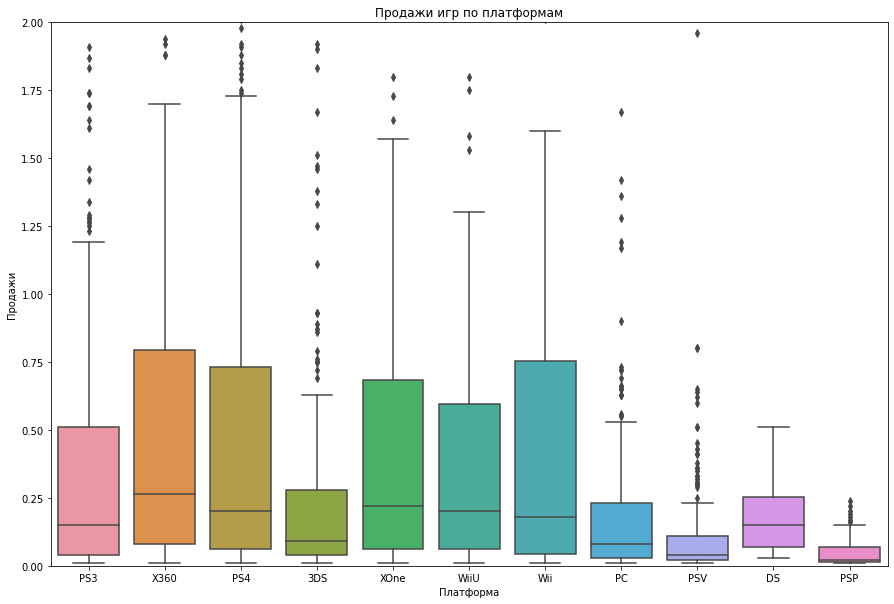

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data=period, x='platform', y='total_sales')
plt.ylim(0,2)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь уместна <b>вторая</b> диаграмма размаха со всеми максимумами продаж за актуальный период, а не только с масштабированными данными. А так не видим выбросы. Примерно вот так:</font>
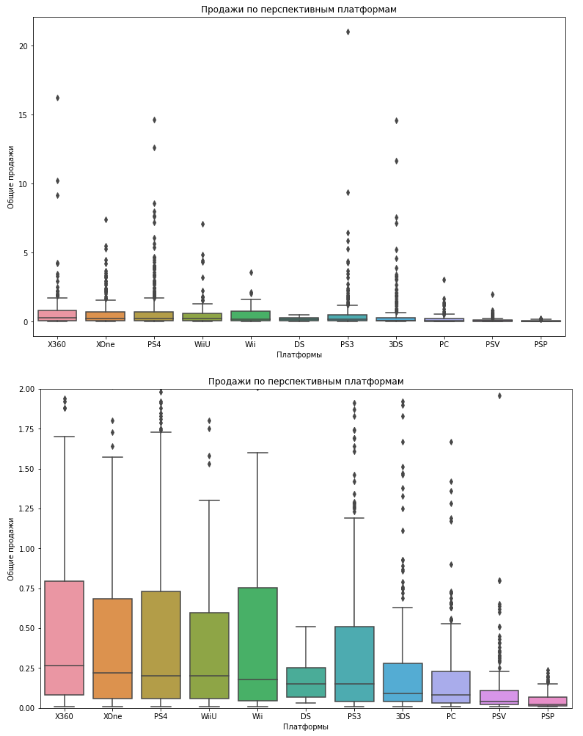

Платформа Х360 имеет максимальный медианный показатель. PS4 и XOne имеют похожие показатели. 

**3.6 Анализ влияния внутри платформ отзывов критиков и пользователей**

In [41]:
top_5 = (period.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
top_5

['PS4', 'PS3', 'XOne', '3DS', 'X360']

Топ 5 платформ - PS4, PS3, XOne, 3DS, X360

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376


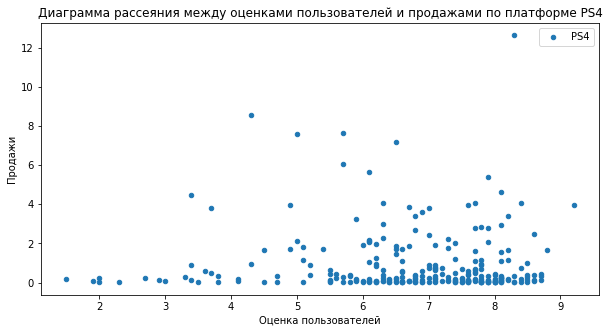

Корреляция между оценками пользователей и продажами по платформе PS3  = 0.0023944027357566925


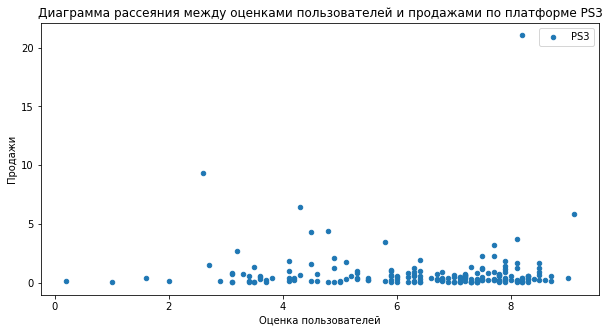

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


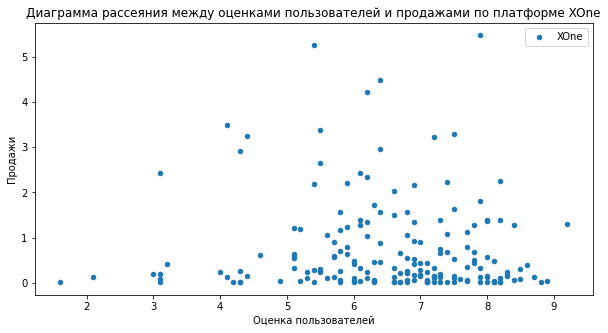

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.24150411773563016


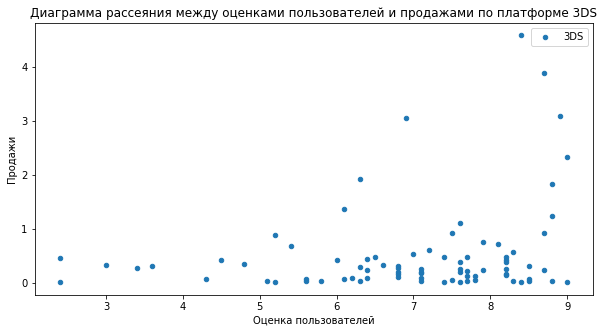

Корреляция между оценками пользователей и продажами по платформе X360  = -0.011742185147181342


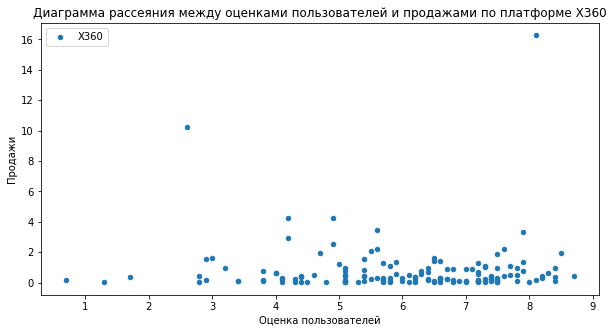

In [42]:
for b in top_5:
    (
    period.query('platform == @b')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Диаграмма рассеяния между оценками пользователей и продажами по платформе {b}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([b])
    print(f'Корреляция между оценками пользователей и продажами по платформе {b}  =', period.query('platform == @b')['user_score'].corr(period.query('platform == @b')['total_sales']))
    plt.show()

Зависимость между продажами и оценками пользователей выбранных топ-5 платформ отсутствует

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095


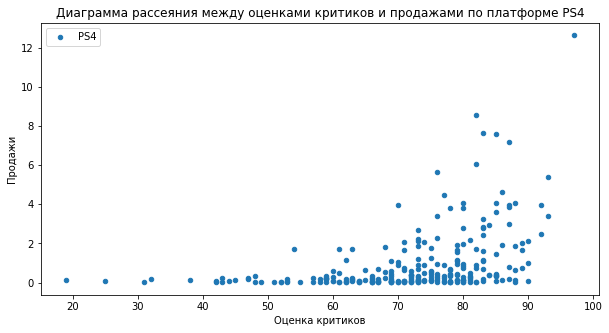

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3342853393371919


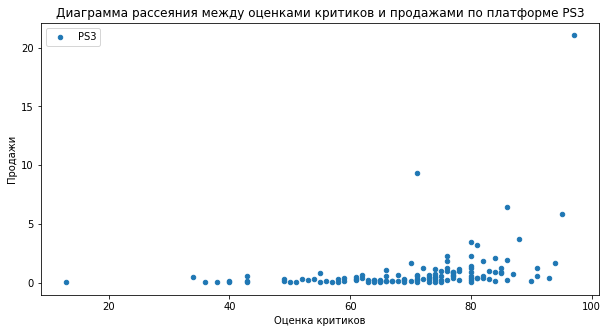

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


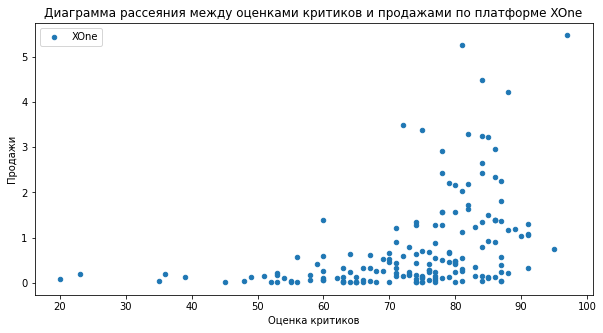

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3570566142288103


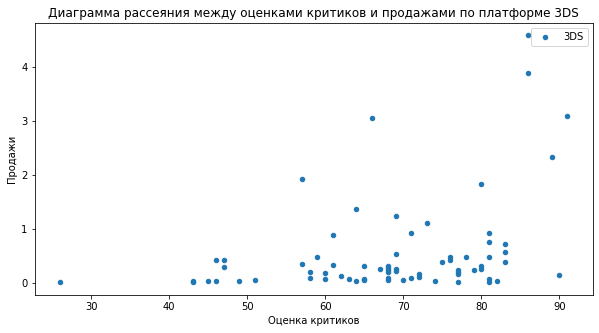

Корреляция между оценками критиков и продажами по платформе X360  = 0.3503445460228664


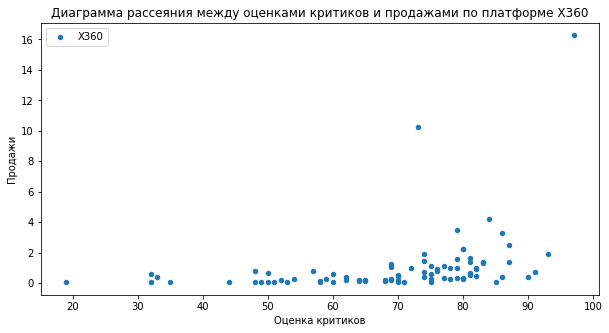

In [43]:
for b in top_5:
    (
    period.query('platform == @b')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Диаграмма рассеяния между оценками критиков и продажами по платформе {b}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([b])
    print(f'Корреляция между оценками критиков и продажами по платформе {b}  =', period.query('platform == @b')['critic_score'].corr(period.query('platform == @b')['total_sales']))
    plt.show()

Оценки критиков имеют более большее влияние на объемы продаж, чем оценки пользователей. Однако и здесь сильной зависимости нет.

**3.7 Распределение игр по жанрам, выбор самых прибыльных жанров**

In [44]:
period_genre = pd.pivot_table(period, index='genre', values='total_sales', aggfunc={'total_sales': ['sum', 'mean', 'median']})
display(period_genre.sort_values('sum', ascending=False))

,mean,median,sum
genre,,,
Action,0.420196,0.110,321.87
Shooter,1.245882,0.450,232.98
Sports,0.703972,0.240,150.65
Role-Playing,0.499623,0.125,145.89
Misc,0.405290,0.100,62.82
Platform,0.576081,0.225,42.63
Racing,0.469294,0.120,39.89
Fighting,0.441375,0.125,35.31
Adventure,0.096490,0.030,23.64


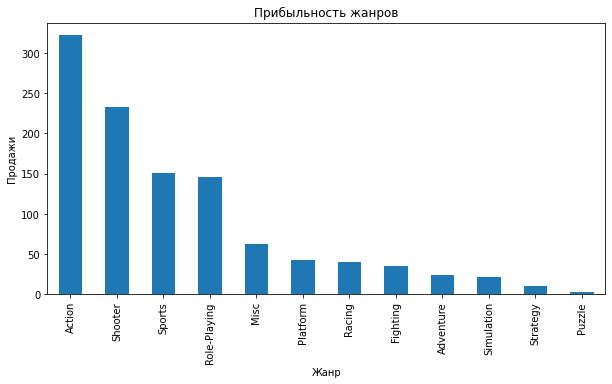

In [45]:
(period
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
)
plt.title('Прибыльность жанров')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

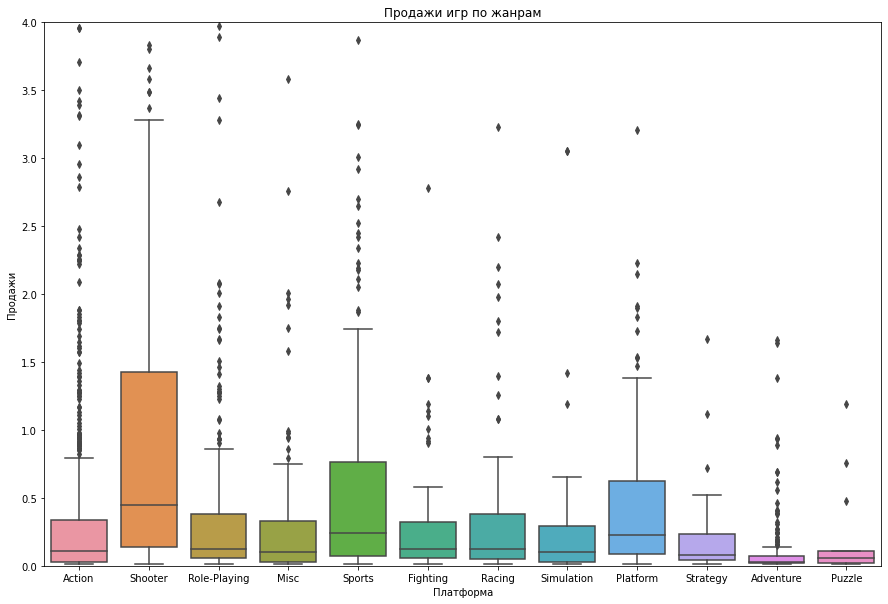

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=period, x='genre', y='total_sales')
plt.ylim(0,4)
plt.title('Продажи игр по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По суммарной выручке лидирует жанр Action, потом следует Shooter и Sports. Однако по медианным значениям лидер - Shooter, а за ним Sports.

**Вывод**

До 1990 года игр выпускалось немного. С 1995г. началось увеличение количества игр, с 2010г. наблюдается снижение. Лидеры продаж 6 платформ: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Пик продаж платформы PS - 1998г., платформы PS2 - 2003-2005гг., платформы DS - 2005-2007гг., платформы Wii - 2010г., платформы Х360 - 2011, платформы PS3 - 2012г. Имеется тенденция: как только появляется и становится популярной новая платформа, продажи старой резко падают. Характерный период появления новых и исчезновения старых платформ примерно 10 лет. Рост продаж платформ как правило в течении 5 лет. Актуальным периодом считаю период, начиная с 2013г., т.к. он не сильно отдален от 2017г. и на рынке присутствуют крупные платформы X360, PS3. Рассматривая отрезок времени с 2013г., лидеры продаж: PS4, PS3, XOne. У всех платформ продажи падают после 2015г. Но только 2 платформы PS4 и XOne имеют негативную тенденцию с 2015г., тогда как у остальных продажи падают на всем изучаемом отрезке времени. Платформа Х360 имеет максимальный медианный показатель продаж. PS4 и XOne имеют похожие показатели. Зависимость между продажами и оценками пользователей отсутствует. Оценки критиков имеют более большее влияние на объемы продаж, чем оценки пользователей. Однако и здесь сильной зависимости нет. По суммарной выручке лидирует жанр Action, потом следует Shooter и Sports. Однако по медианным значениям лидер - Shooter, а за ним Sports.

## 4.Портрет пользователя каждого региона ##

**Топ-5 платформ**

In [47]:
na_platform = period.groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_platform = period.groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_platform = period.groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

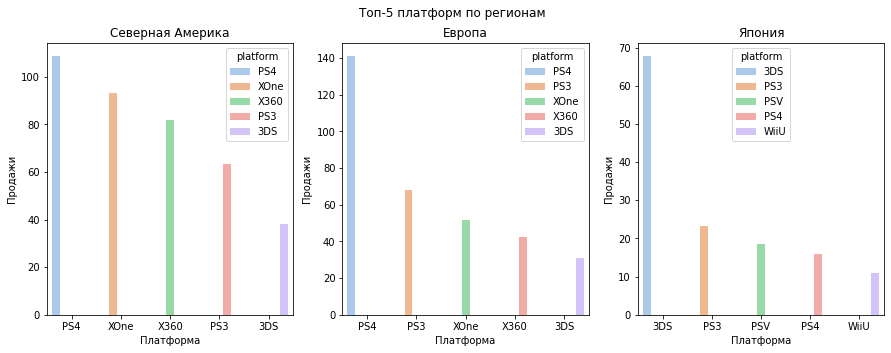

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Топ-5 платформ по регионам')

sns.barplot(y='na_sales', x='platform', data=na_platform, ax=ax[0], hue = 'platform', palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Платформа')

sns.barplot(y='eu_sales', x='platform', data=eu_platform, ax=ax[1], hue = 'platform', palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Платформа')

sns.barplot(y='jp_sales', x='platform', data=jp_platform, ax=ax[2], hue = 'platform', palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Платформа')
plt.show()

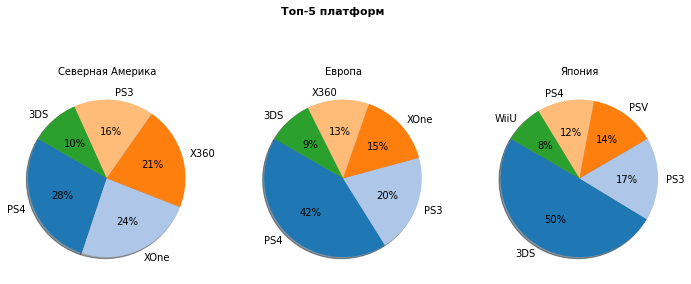

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
# Сформируем поле для диаграмм

ax[0].pie(na_platform['na_sales'],
          labels=na_platform['platform'],
          shadow=True,
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 10},
          colors=sns.color_palette('tab20'))
ax[0].set_title('Северная Америка', fontsize=10, fontweight='normal')

ax[1].pie(eu_platform['eu_sales'],
       labels=eu_platform['platform'],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[1].set_title('Европа', fontsize=10, fontweight='normal')

ax[2].pie(jp_platform['jp_sales'],
       labels=jp_platform['platform'],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[2].set_title('Япония', fontsize=10, fontweight='normal')
plt.suptitle('Топ-5 платформ', fontsize=11, fontweight='bold')
plt.show()

В Европе и Северной Америке по суммарным продажам лидирует платформа PS4 (42% и 28% рынка соответственно). В Японии половину рынка занимает платформа 3DS (50%) 

**Топ-5 жанров**

In [50]:
na_genre = period.groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_genre = period.groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_genre = period.groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

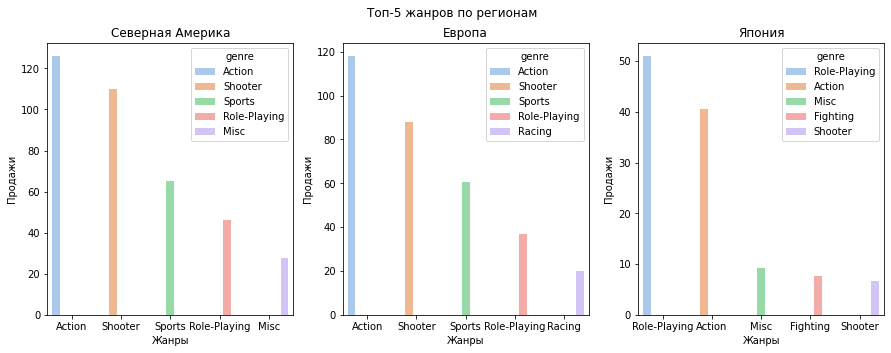

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Топ-5 жанров по регионам')

sns.barplot(y='na_sales', x='genre', data=na_genre, ax=ax[0], hue = 'genre', palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Жанры')

sns.barplot(y='eu_sales', x='genre', data=eu_genre, ax=ax[1], hue = 'genre', palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Жанры')

sns.barplot(y='jp_sales', x='genre', data=jp_genre, ax=ax[2], hue = 'genre', palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Жанры')
plt.show()

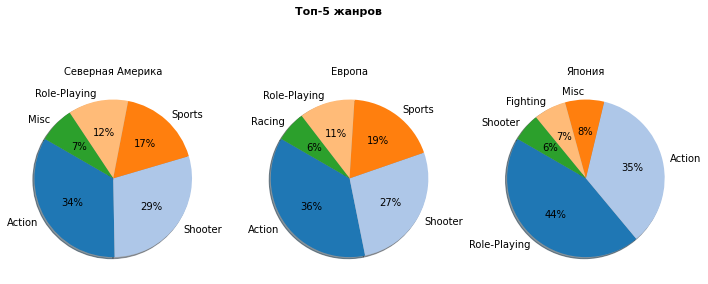

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
# Сформируем поле для диаграмм

ax[0].pie(na_genre['na_sales'],
          labels=na_genre['genre'],
          shadow=True,
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 10},
          colors=sns.color_palette('tab20'))
ax[0].set_title('Северная Америка', fontsize=10, fontweight='normal')


ax[1].pie(eu_genre['eu_sales'],
       labels=eu_genre['genre'],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[1].set_title('Европа', fontsize=10, fontweight='normal')


ax[2].pie(jp_genre['jp_sales'],
       labels=jp_genre['genre'],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[2].set_title('Япония', fontsize=10, fontweight='normal')
plt.suptitle('Топ-5 жанров', fontsize=11, fontweight='bold')
plt.show()

В Северной Америке и Европе распределение топовых жанров схожи. На первом месте по продажам Action (34% и 36% соответственно), за ним следует Shooter (29% и 27%). В Японии лидирует Role-Playing (44%), на втором месте Action (35%).

**Рейтинги**

In [53]:
na_rating = period.groupby('rating')['na_sales'].agg(na_sales='sum').sort_values(by = 'na_sales', ascending = False).reset_index()
eu_rating = period.groupby('rating')['eu_sales'].agg(eu_sales='sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
jp_rating = period.groupby('rating')['jp_sales'].agg(jp_sales='sum').sort_values(by = 'jp_sales', ascending = False).reset_index()

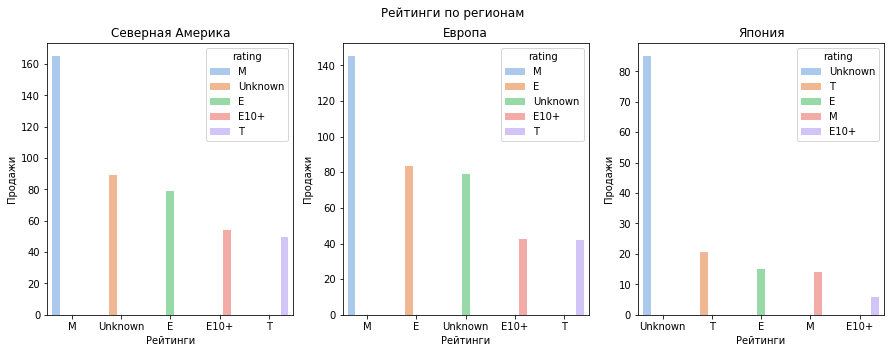

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Рейтинги по регионам')

sns.barplot(y='na_sales', x='rating', data=na_rating, ax=ax[0], hue = 'rating', palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Рейтинги')

sns.barplot(y='eu_sales', x='rating', data=eu_rating, ax=ax[1], hue = 'rating', palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Рейтинги')

sns.barplot(y='jp_sales', x='rating', data=jp_rating, ax=ax[2], hue = 'rating', palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Рейтинги')
plt.show()

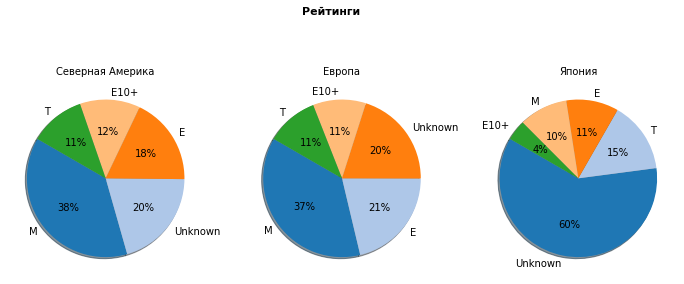

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
# Сформируем поле для диаграмм

ax[0].pie(na_rating['na_sales'],
          labels=na_rating['rating'],
          shadow=True,
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 10},
          colors=sns.color_palette('tab20'))
ax[0].set_title('Северная Америка', fontsize=10, fontweight='normal')


ax[1].pie(eu_rating['eu_sales'],
       labels=eu_rating['rating'],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[1].set_title('Европа', fontsize=10, fontweight='normal')


ax[2].pie(jp_rating['jp_sales'],
       labels=jp_rating['rating'],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[2].set_title('Япония', fontsize=10, fontweight='normal')
plt.suptitle('Рейтинги', fontsize=11, fontweight='bold')
plt.show()

В Северной Америке и Европе лидер по продажам рейтинг М. В Японии 60% игр без установленного возрастного рейтинга.

**Вывод**

В Европе и Северной Америке по суммарным продажам лидирует платформа PS4 (42% и 28% рынка соответственно). В Японии половину рынка занимает платформа 3DS (50%). В Северной Америке и Европе распределение топовых жанров схожи. На первом месте по продажам Action (34% и 36% соответственно), за ним следует Shooter (29% и 27%). В Японии лидирует Role-Playing (44%), на втором месте Action (35%). В Северной Америке и Европе лидер по продажам рейтинг М. В Японии 60% игр без установленного возрастного рейтинга.

Портрет пользователя Северной Америки: старше 17 лет, предпочитает платформу PS4 и жанр Action.

Портрет пользователя Европы: старше 17 лет, предпочитает платформу PS4 и жанр Action.

Портрет пользователя Японии: предпочитает платформу 3DS и жанр Role-Playing.

Портреты пользователей Северной Америки и Европы очень похожи между собой.

## 5.Проверка гипотез ##

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [56]:
Xone = period.query('platform == "XOne"')
Xone = Xone[Xone['user_score'].notna()]
Xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [57]:
PC = period.query('platform == "PC"')
PC = PC[PC['user_score'].notna()]
PC['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Средние значения достаточно близки.

Для проверки гипотез буду использовать тест Стьюдента

Гипотезы

Н0: Средние пользовательские рейтинги платформ XOne и PC равны

Н1: Средние пользовательские рейтинги платформ XOne и PC не равны

In [58]:
alpha = 0.05

results = st.ttest_ind(Xone['user_score'], PC['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, следовательно, можно предположить, что средние пользовательские рейтинги XOne и PC равны, при alpha=0.05

**Средние пользовательские рейтинги жанров Action и Sports разные**

In [59]:
Action = period.query('genre == "Action"')
Action = Action[Action['user_score'].notna()]
Action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [60]:
Sports = period.query('genre == "Sports"')
Sports = Sports[Sports['user_score'].notna()]
Sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Средние значения отличаются

Для проверки гипотез буду использовать тест Стьюдента

Гипотезы

Н0: Средние пользовательские рейтинги платформ Action и Sports равны

Н1: Средние пользовательские рейтинги платформ Action и Sports не равны

In [61]:
alpha = 0.05

results = st.ttest_ind(Action['user_score'], Sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно, есть основания предположить, что средние пользовательские рейтинги Action и Sports не равны, при alpha=0.05

## 6.Общий вывод ##

В рамках проекта проведена большая работа. 

Изучена представленная таблица, названия столбцов приведены к нижнему регистру. Проведя анализ на пропуски, в данных были удалены 2 строки с пропусками в названиях игр и 269 строк с пропусками данных в столбце год выпуска. Процент пропусков в столбцах оценок критиков, пользователей и рейтинга очень высок. Однако эти пропуски заменить нечем. Оценки индивидуальны. Аббревиатура 'tbd' в столбце оценка пользователей означает, что оценка не определена, замена на NAN. Изменены типы данных в столбцах оценок пользователей, оценок критиков и год выпуска. Создан столбец с суммарными продажами игр по регионам. Проверка на дубликаты показала, что дубликаты отсутствуют.

В рамках исследовательского анализа вывлены следующие закономерности. До 1990 года игр выпускалось немного. С 1995г. началось увеличение количества игр, с 2010г. наблюдается снижение. Лидеры продаж 6 платформ: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Пик продаж платформы PS - 1998г., платформы PS2 - 2003-2005гг., платформы DS - 2005-2007гг., платформы Wii - 2010г., платформы Х360 - 2011, платформы PS3 - 2012г. Имеется тенденция: как только появляется и становится популярной новая платформа, продажи старой резко падают. Характерный период появления новых и исчезновения старых платформ примерно 10 лет. Рост продаж платформ как правило в течении 5 лет. Актуальным периодом считаю период, начиная с 2013г., т.к. он не сильно отдален от 2017г. и на рынке присутствуют крупные платформы X360, PS3. Рассматривая отрезок времени с 2013г., лидеры продаж: PS4, PS3, XOne. У всех платформ продажи падают после 2015г. Но только 2 платформы PS4 и XOne имеют негативную тенденцию с 2015г., тогда как у остальных продажи падают на всем изучаемом отрезке времени. Платформа Х360 имеет максимальный медианный показатель продаж. PS4 и XOne имеют похожие показатели. Зависимость между продажами и оценками пользователей отсутствует. Оценки критиков имеют более большее влияние на объемы продаж, чем оценки пользователей. Однако и здесь сильной зависимости нет. По суммарной выручке лидирует жанр Action, потом следует Shooter и Sports. Однако по медианным значениям лидер - Shooter, а за ним Sports.

Проводя анализ по регионам, можно отметить следующее. В Европе и Северной Америке по суммарным продажам лидирует платформа PS4 (42% и 28% рынка соответственно). В Японии половину рынка занимает платформа 3DS (50%). В Северной Америке и Европе распределение топовых жанров схожи. На первом месте по продажам Action (34% и 36% соответственно), за ним следует Shooter (29% и 27%). В Японии лидирует Role-Playing (44%), на втором месте Action (35%). В Северной Америке и Европе лидер по продажам рейтинг М. В Японии 60% игр без установленного возрастного рейтинга.

Портрет пользователя Северной Америки: старше 17 лет, предпочитает платформу PS4 и жанр Action.

Портрет пользователя Европы: старше 17 лет, предпочитает платформу PS4 и жанр Action.

Портрет пользователя Японии: геймеры предпочитает платформу 3DS и жанр Role-Playing.

Портреты пользователей Северной Америки и Европы очень похожи между собой.

Проверяя гипотезы, можно предположить следующее: средние пользовательские рейтинги платформ XOne и PC равны и средние пользовательские рейтинги Action и Sports не равны, при alpha=0.05

Рекомендации для компании на 2017г.

Так как имеется тенденция к общему снижению продаж, выручка в 2017г. вероятно будет ниже, чем в 2016г.

Считаю наиболее перспективным для Европы и Северной Америки расходовать на рекламу платформы PS4, игры жанра Action и рассчитывать на геймеров, старше 17 лет. Для Японии - наиболее перспективна платформа Role-Playing, жанр Action.